In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from google.colab import drive
drive.mount('/content/drive')


marvellous = pd.read_csv("/content/drive/MyDrive/DSlab/employees.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
marvellous.head()

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,12/8/1993,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
1,348,33,Francis Mraz,Mr,Male,1,Married,24,3/14/1995,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1/27/1988,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,10/1/1999,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,1/26/2001,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980


In [ ]:
marvellous["Marital_Status"].isna().sum()

67

In [ ]:
#Emplo
print(len(marvellous["Employee_Code"].unique())/len(marvellous))
print(len(marvellous["Employee_No"].unique())/len(marvellous))

1.0
1.0




*   **Employee_No** and **Employee_code** are identifiers for each employee
*   **Name** and **Title** is not needed
*   Since the **title** is revealed by the **gender**






In [ ]:
marvellous.drop(["Employee_No","Employee_Code","Name", "Title"], axis=1, inplace=True)

# Removing the columns which have same values

Here We can see that the Religion ID and the Religion and the Desgination and the Designation Id are the same

In [ ]:
for x in list(marvellous["Religion_ID"].unique()):
    print(x)
    print(marvellous[marvellous["Religion_ID"]==x]["Religion"].unique())
    print("-------------")

1
['Buddhist']
-------------
4
['Catholic']
-------------
3
['Hindu']
-------------
5
['Muslim']
-------------


In [ ]:
for x in list(marvellous["Designation_ID"].unique()):

    if len(marvellous[marvellous["Designation_ID"]==x]["Designation"].unique()) != 1:
        print("Not unique")
        print(x)
        print("-----")

# Handling the Values in the Date of Birth


In [ ]:

marvellous["Year_of_Birth"] = marvellous["Year_of_Birth"].replace("'0000'", np.nan)


In [ ]:
marvellous["Year_of_Birth"] = pd.to_numeric(marvellous["Year_of_Birth"], errors='coerce')

<Axes: xlabel='Year_of_Birth', ylabel='Count'>

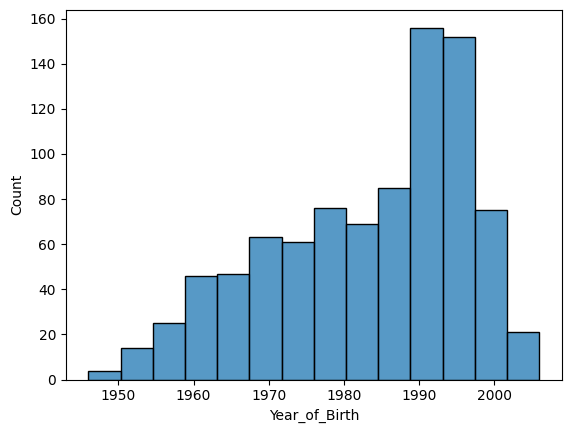

In [ ]:
sns.histplot(marvellous["Year_of_Birth"])

We have taken the current year as 2023 since the fincnacial data contains the dates upto 2023 and in age determination we have used the 2023 as the current age

In [ ]:
age = 2023 - marvellous["Year_of_Birth"]

By analysing the below 2 boxplots what we can come up is that


1.   most of the married people have higher ages with compared with the unmarried
2.   Management people are in higher ages when comapred with the others



<Axes: xlabel='Marital_Status', ylabel='Year_of_Birth'>

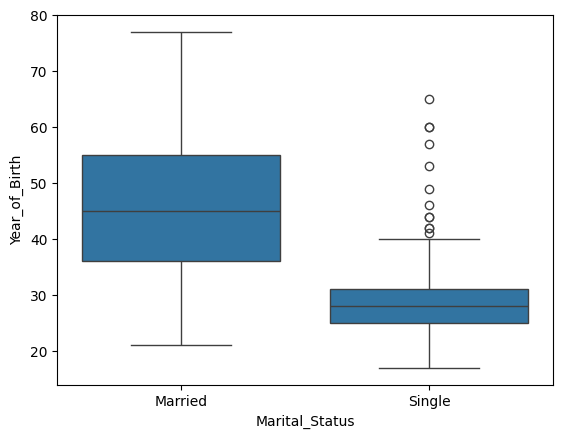

In [ ]:

sns.boxplot(x="Marital_Status", y=age, data=marvellous)


<Axes: xlabel='Employment_Category', ylabel='Year_of_Birth'>

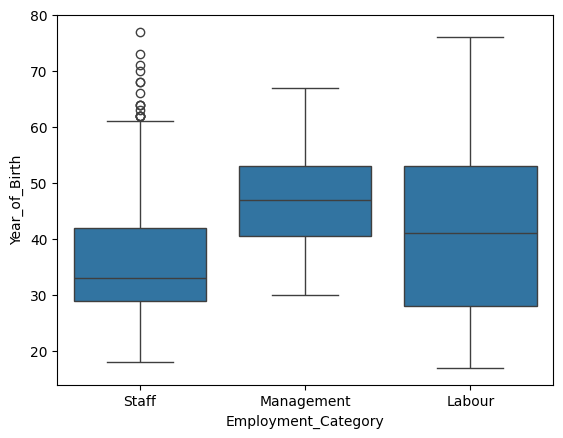

In [ ]:
sns.boxplot(marvellous, x="Employment_Category", y=age)


# Handling the Date Columns
In here what we did was getting the number of years where each employeee has worked

In [ ]:
marvellous['Date_Joined'] = pd.to_datetime(marvellous['Date_Joined'], errors='coerce')
marvellous['Date_Resigned'] = pd.to_datetime(marvellous['Date_Resigned'], errors='coerce')
marvellous['Inactive_Date'] = pd.to_datetime(marvellous['Inactive_Date'], errors='coerce')

<ipython-input-108-ff1001064df8>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marvellous['Date_Resigned'] = pd.to_datetime(marvellous['Date_Resigned'], errors='coerce')
<ipython-input-108-ff1001064df8>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marvellous['Inactive_Date'] = pd.to_datetime(marvellous['Inactive_Date'], errors='coerce')


In [ ]:

ages_in_the_company = (marvellous['Date_Resigned'] - marvellous['Date_Joined']).dt.days / 365
ages_in_the_company = ages_in_the_company.fillna((pd.to_datetime('2023-01-01') - marvellous['Date_Joined']).dt.days / 365)

marvellous["ages_in_the_company"] = ages_in_the_company


In [ ]:
#remove them we don't need it now
marvellous.drop(["Date_Joined", "Date_Resigned","Inactive_Date"], axis=1, inplace=True)

# Check the Reporting Cases
I can't fgoure out WTF this two cols are about and created a boolean variable showing if someone has get reported

In [ ]:
z = np.where((marvellous["Reporting_emp_1"] != "\\N") | (marvellous["Reporting_emp_2"] != "\\N"), 1,0)
marvellous["reported"] = z


In [ ]:
marvellous.drop(["Reporting_emp_1","Reporting_emp_2", "Religion_ID"], axis=1, inplace=True)
#religion destinations are also removed since we have the encded data
#Relegion, Designation


# Adding Binary and the Ordinal encoding

In [ ]:
Gender_map = {"Male":1, "Female":0}
Status_map = {"Inactive":0, "Active":1}
Employment_Category_map = {"Labour":1, "Staff":2, "Management":3}
marvellous["Gender"] = marvellous["Gender"].map(Gender_map)
marvellous["Status"] = marvellous["Status"].map(Status_map)
marvellous["Employment_Category"] = marvellous["Employment_Category"].map(Employment_Category_map)


#one hot encoding


*   Marital Status
*   Employment Type
*   Religion



In [ ]:

one_hot = pd.get_dummies(marvellous["Marital_Status"], prefix="Marital_Status")
marvellous = pd.concat([marvellous, one_hot], axis=1)
#marvellous.drop("Marital_Status", axis=1, inplace=True)

one_hot = pd.get_dummies(marvellous["Employment_Type"], prefix="Employment_Type")
marvellous = pd.concat([marvellous, one_hot], axis=1)
#marvellous.drop("Employment_Type", axis=1, inplace=True)

one_hot = pd.get_dummies(marvellous["Religion"], prefix="Religion")
marvellous = pd.concat([marvellous, one_hot], axis=1)



Here we are using the KNN imputer to impute the year of birth column and we used multiple k values and checked the ditribution of the data after being imputed and we have selected the k wich gives slighter deviation to the original distribution

In [ ]:

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import KNNImputer

# Create a copy of the dataframe
df = marvellous.copy().drop(["Marital_Status", "Employment_Type", "Religion", "Designation"], axis=1)



# Impute missing values using KNNImputer
imputer = KNNImputer(n_neighbors=5)

df.loc[:, :] = imputer.fit_transform(df)

# Add the imputed 'Year_of_Birth' column back

In [ ]:
temp_df = marvellous.copy().drop(["Marital_Status", "Employment_Type", "Religion", "Designation"], axis=1)

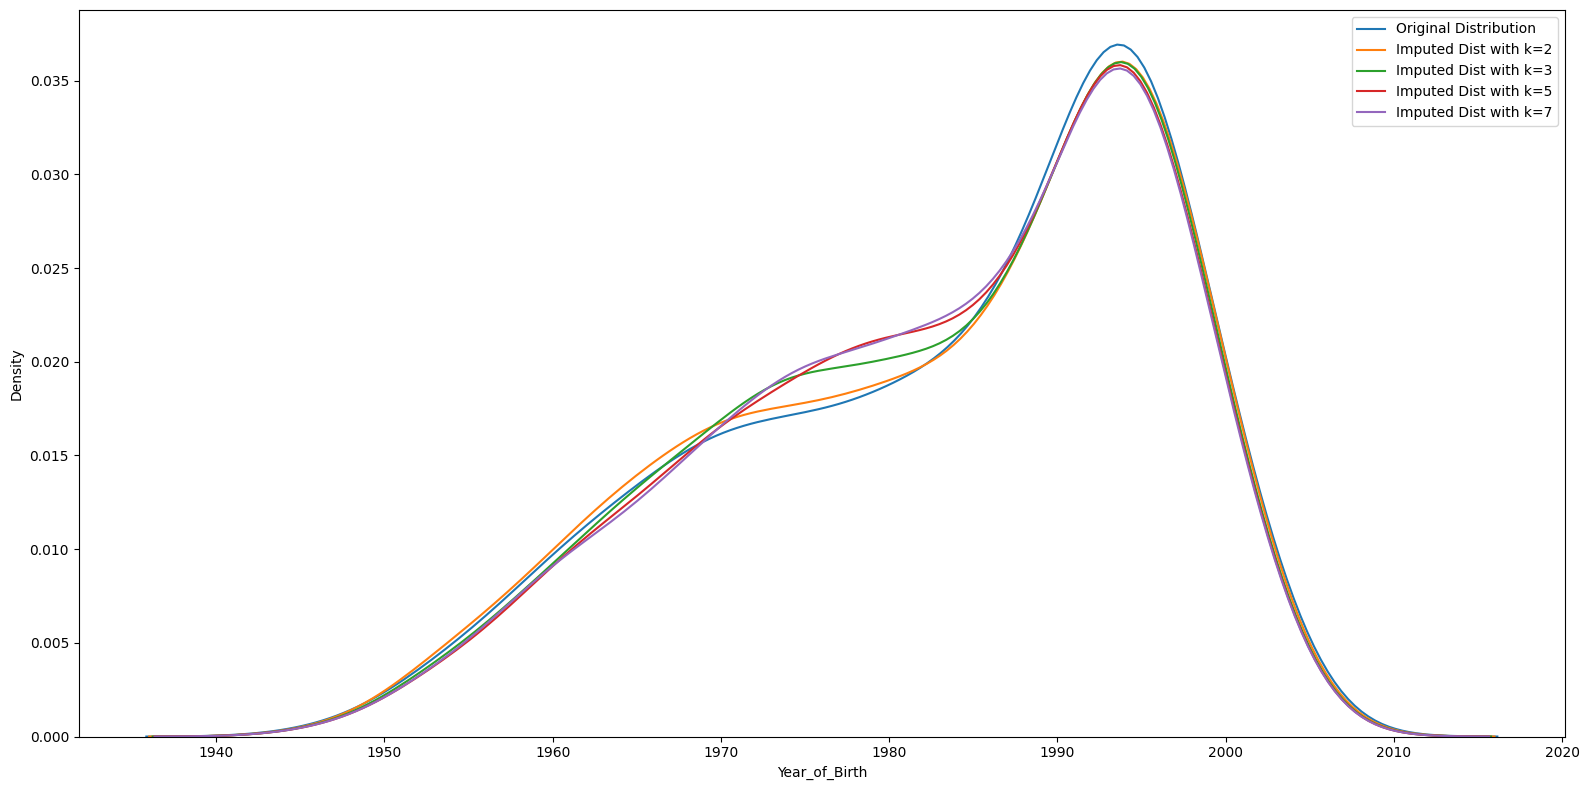

In [ ]:
n_neighbors = [2, 3, 5, 7]

fig, ax = plt.subplots(figsize=(16, 8))
# Plot the original distribution
sns.kdeplot(marvellous["Year_of_Birth"], label="Original Distribution")
for k in n_neighbors:
    knn_imp = KNNImputer(n_neighbors=k)
    df.loc[:, :] = knn_imp.fit_transform(temp_df)
    sns.kdeplot(df["Year_of_Birth"], label=f"Imputed Dist with k={k}", ax=ax)

plt.legend();
plt.tight_layout()
plt.show()

In [ ]:
imputer = KNNImputer(n_neighbors=2)

imputer = KNNImputer(n_neighbors=k)
df.loc[:, :] = imputer.fit_transform(temp_df)

In [ ]:
marvellous["Year_of_Birth"] = df["Year_of_Birth"].astype(int)

In [ ]:
marvellous["Year_of_Birth"].head()

0    1965
1    1973
2    1974
3    1974
4    1980
Name: Year_of_Birth, dtype: int64

In [ ]:
df_salary = pd.read_csv('/content/drive/MyDrive/DSlab/salary.csv')


In [ ]:
# create data frame only include 'Employee_No','Net Salary','Year','month'
df_salary_summery = df_salary[['Employee_No', 'Net Salary', 'year', 'month','Total Working Days']]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# calculate annual salary
annual_salary = df_salary_summery.groupby(['Employee_No', 'year'])['Net Salary'].sum().reset_index()

# Print the result
annual_salary.head()

,Employee_No,year,Net Salary
0,347,2021,172403.83
1,347,2022,409310.96
2,348,2021,271019.70
3,348,2022,733649.30
4,351,2021,226743.61


In [ ]:

median_annual_salary = annual_salary.groupby('Employee_No')['Net Salary'].median().reset_index()

# Print the median annual salary for each employee
median_annual_salary.head()


,Employee_No,Net Salary
0,347,290857.395
1,348,502334.500
2,351,136735.930
3,352,282376.955
4,354,566526.290


In [ ]:
id_df = pd.read_csv("/content/drive/MyDrive/DSlab/employees.csv")
marvellous["Employee_No"] = id_df["Employee_No"]

In [ ]:
# Merge the median annual salary data with the marvellous dataframe
marvellous = marvellous.merge(median_annual_salary, on='Employee_No', how='left')

In [ ]:
marvellous["Net Salary"] = marvellous["Net Salary"].replace(0, np.nan)


In [ ]:
marvellous["Net Salary"].isnull().sum()/len(marvellous)

0.30992978936810434

In [ ]:
z = marvellous.drop(["Employee_No"], axis=1)
n = z.copy(deep=True).drop(["Marital_Status", "Employment_Type", "Religion", "Designation", "Marital_Status"], axis=1)
temp_df = n.copy(deep=True)

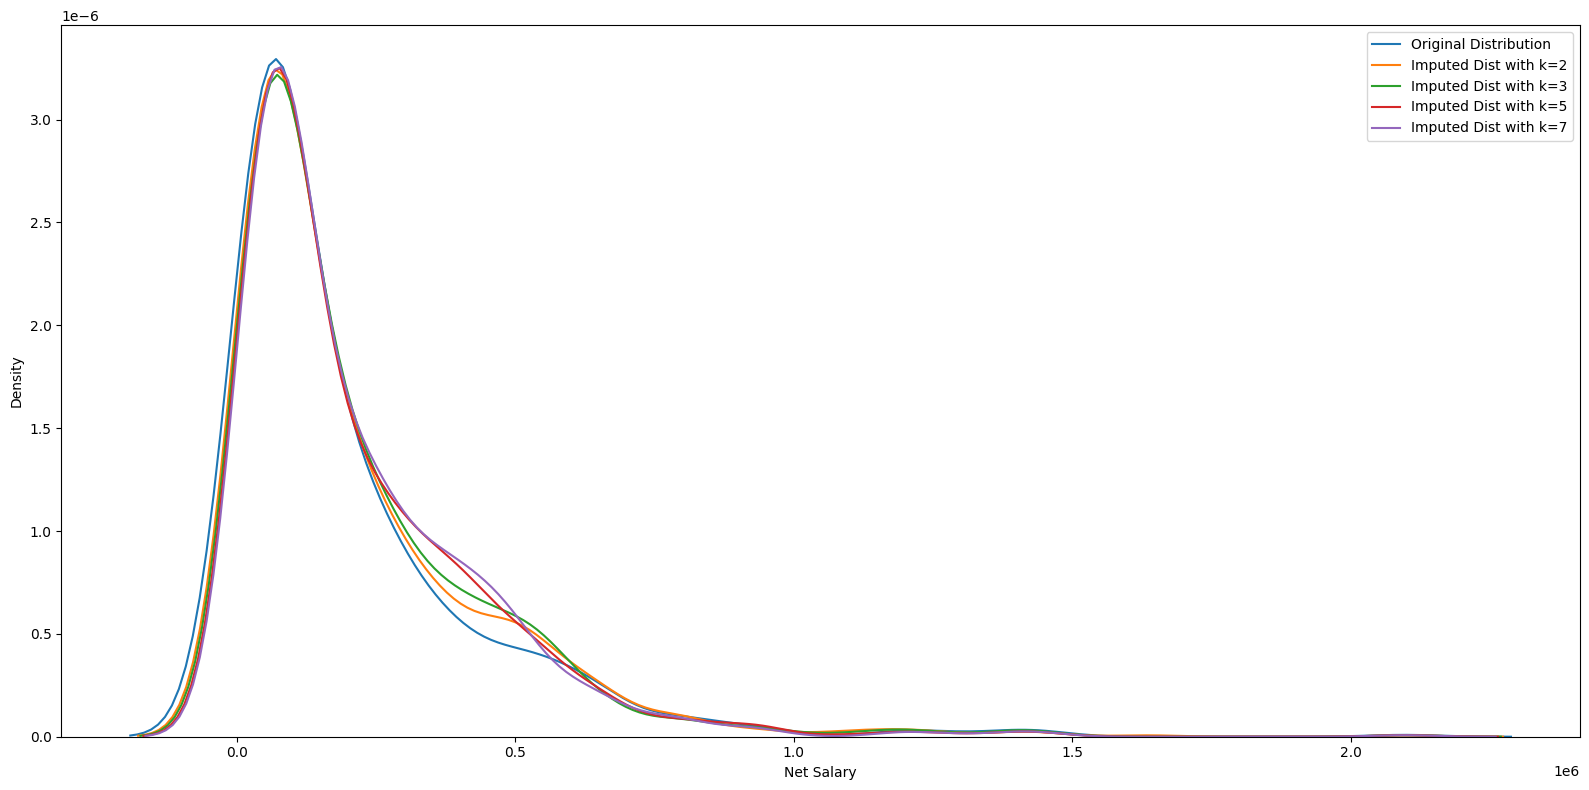

In [ ]:
n_neighbors = [2, 3, 5, 7]

fig, ax = plt.subplots(figsize=(16, 8))
# Plot the original distribution
sns.kdeplot(temp_df["Net Salary"], label="Original Distribution")
for k in n_neighbors:
    knn_imp = KNNImputer(n_neighbors=k)
    temp_df.loc[:, :] = knn_imp.fit_transform(n)
    sns.kdeplot(temp_df["Net Salary"], label=f"Imputed Dist with k={k}", ax=ax)

plt.legend();
plt.tight_layout()
plt.show()

In [ ]:
knn_imp = KNNImputer(n_neighbors=2)
temp_df.loc[:, :] = knn_imp.fit_transform(n)

In [ ]:
################################
# HYPOTHESIS TESTING
################################

Chi-square statistic: 19.420488818889876
p-value: 6.065888667228183e-05
Degrees of freedom: 2
Reject the null hypothesis at 0.05 level of significance: Employment Category does not have an impact on the employment status


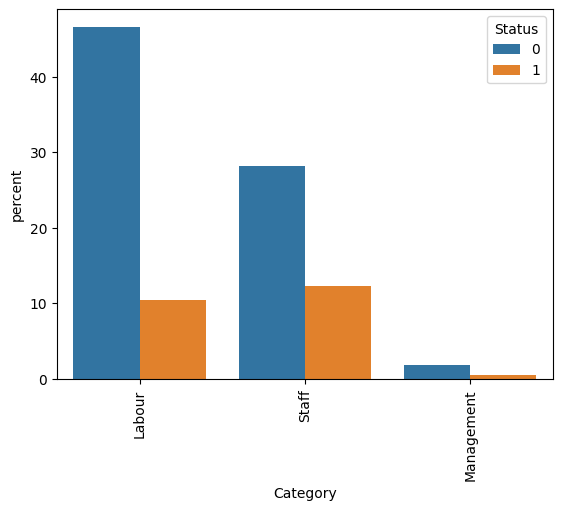

In [ ]:
# Hypothesis 1

# Employment Category does not have an impact on the employment status


from scipy import stats as st


# Create a contingency table
crosstab = pd.crosstab(marvellous['Employment_Category'], marvellous['Status'])

# Perform a chi-square test
chi2, p, dof, expected = st.chi2_contingency(crosstab)

# Set the significance level
alpha = 0.05

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

# Interpret the results
if p < alpha:
  print(f"Reject the null hypothesis at {alpha} level of significance: Employment Category does not have an impact on the employment status")
else:
  print("Fail to reject the null hypothesis: Employment Category does not have an impact on the employment status")

sns.countplot(df, x="Employment_Category", hue="Status", stat="percent")
plt.xlabel("Category")
plt.xticks(ticks=[0, 1, 2], labels=["Labour", "Staff", "Management"])
plt.tick_params(axis='x', rotation=90)

Chi-square statistic: 6.635632103042585
p-value: 0.00999587204002437
Degrees of freedom: 1
Reject the null hypothesis at 0.05 level of significance: Employment Type does not have an impact on the employment status


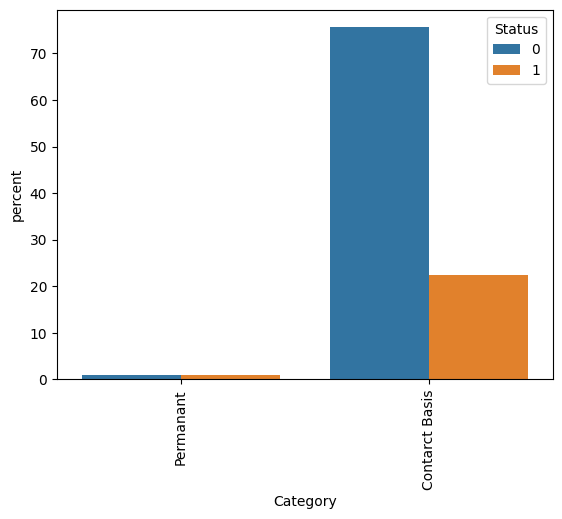

In [ ]:
# Hypothesis 2

# Employment Type does not have an impact on the employment status


from scipy import stats as st


# Create a contingency table
crosstab = pd.crosstab(marvellous['Employment_Type'], marvellous['Status'])

# Perform a chi-square test
chi2, p, dof, expected = st.chi2_contingency(crosstab)

# Set the significance level
alpha = 0.05

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

# Interpret the results
if p < alpha:
  print(f"Reject the null hypothesis at {alpha} level of significance: Employment Type does not have an impact on the employment status")
else:
  print("Fail to reject the null hypothesis: Employment Type does not have an impact on the employment status")

sns.countplot(marvellous, x="Employment_Type", hue="Status", stat="percent")
plt.xlabel("Category")
plt.tick_params(axis='x', rotation=90)

F-statistic: 0.8736340125889003
P-value: 0.35017799611564016
Fail to reject null hypothesis: There is no significant difference in salary between genders.


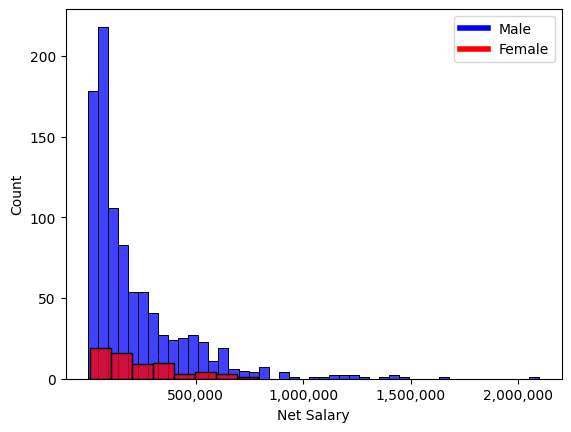

In [ ]:
# Hypothesis 3

# Gender affects the salary of employees

from scipy.stats import f_oneway


marvellous["Net Salary"] = temp_df["Net Salary"]

# Group salaries by gender
female_salaries = marvellous[marvellous['Gender'] == 0]['Net Salary']
male_salaries = marvellous[marvellous['Gender'] == 1]['Net Salary']

# Perform one-way ANOVA test
f_stat, p_value = f_oneway(male_salaries, female_salaries)

print("F-statistic:", f_stat)
print("P-value:", p_value)

# Interpret the result
if p_value < 0.05:
    print(f"Reject the null hypothesis at {alpha} level of significance: There is no significant difference in salary between genders.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in salary between genders.")


sns.histplot(male_salaries, color="blue")
sns.histplot(female_salaries, color="red")

# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xticks(ticks=[500000, 1000000, 1500000, 2000000], labels=["500,000", "1,000,000", "1,500,000", "2,000,000"])

from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color="blue", lw=4),
                Line2D([0], [0], color="red", lw=4)]

plt.legend(custom_lines, ['Male', 'Female'])

Chi-squared statistic: 136.94707535171807
p-value: 1.7205769695162654e-29
Reject the null hypothesis at 0.05 level of significance: There is no significant relationship between salary and employment status.


Text(0.5, 0, 'Salary Range')

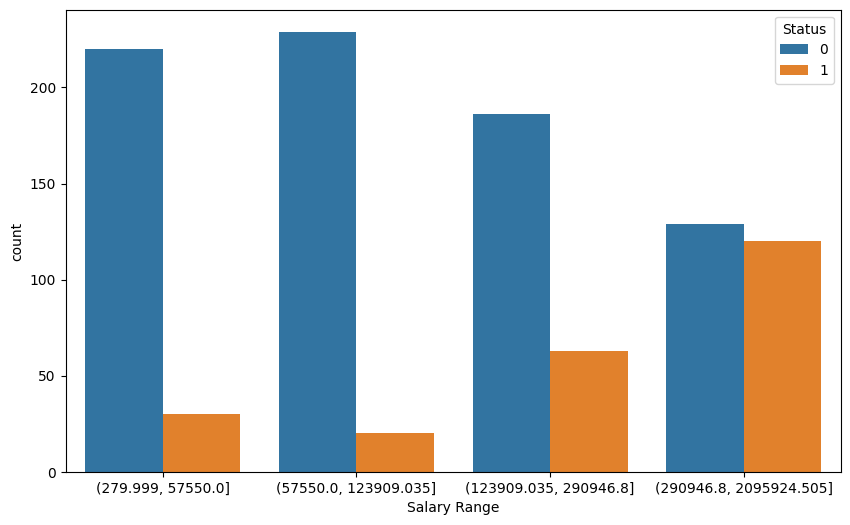

In [ ]:
# Hypothesis 4

# Net Salary does not affect the employment status

# Assuming 'salary' is continuous, convert it into categorical using quartiles bins for chi-squared test
temp = marvellous.copy()
temp['Salary Category'] = pd.qcut(temp['Net Salary'], q=4)

# Create a contingency table
contingency_table = pd.crosstab(temp['Status'], temp['Salary Category'])

# Perform chi-squared test
chi2, p, _, _ = st.chi2_contingency(contingency_table)

# Print the results
print("Chi-squared statistic:", chi2)
print("p-value:", p)

# Set significance level
alpha = 0.05

# Interpret the results
if p <= alpha:
    print(f"Reject the null hypothesis at {alpha} level of significance: There is no significant relationship between salary and employment status.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between salary and employment status.")


plt.figure(figsize=(10, 6))
sns.countplot(temp, x="Salary Category", hue="Status")
plt.xlabel("Salary Range")


Chi-square statistic: 4.0461987006202955
p-value: 0.256518523656958
Degrees of freedom: 3
Fail to reject the null hypothesis: Religion does not have an impact on the employment status


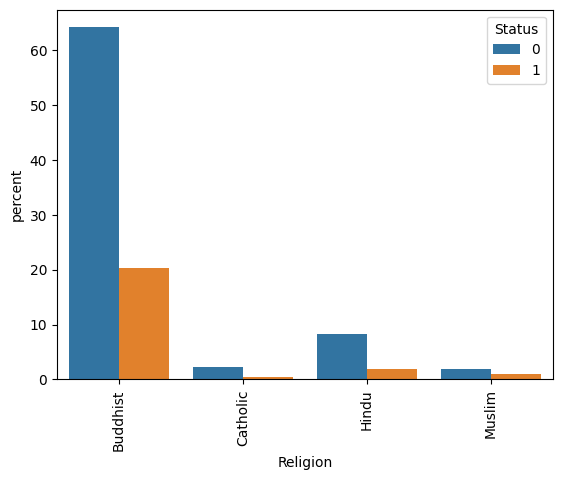

In [ ]:
# Hypothesis 5

#Religion does not affect the employment status



# Hypothesis 2

# Employment Type does not have an impact on the employment status


from scipy import stats as st


# Create a contingency table
crosstab = pd.crosstab(marvellous['Religion'], marvellous['Status'])

# Perform a chi-square test
chi2, p, dof, expected = st.chi2_contingency(crosstab)

# Set the significance level
alpha = 0.05

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

# Interpret the results
if p < alpha:
  print(f"Reject the null hypothesis at {alpha} level of significance: Religion does not have an impact on the employment status")
else:
  print("Fail to reject the null hypothesis: Religion does not have an impact on the employment status")

sns.countplot(marvellous, x="Religion", hue="Status", stat="percent")
plt.xlabel("Religion")
plt.tick_params(axis='x', rotation=90)


In [ ]:
marvellous["Net Salary"] = temp_df["Net Salary"]

In [ ]:
marvellous.head()

,Gender,Marital_Status,Designation_ID,Status,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,ages_in_the_company,reported,Marital_Status_Married,Marital_Status_Single,Employment_Type_Contarct Basis,Employment_Type_Permanant,Religion_Buddhist,Religion_Catholic,Religion_Hindu,Religion_Muslim,Employee_No,Net Salary
0,1,Married,24,1,2,Permanant,Buddhist,Driver,1965,29.084932,0,True,False,False,True,True,False,False,False,347,290857.3950
1,1,Married,24,1,2,Permanant,Buddhist,Driver,1973,27.821918,0,True,False,False,True,True,False,False,False,348,502334.5000
2,1,Married,23,0,2,Permanant,Buddhist,Account Clerk,1974,33.441096,0,True,False,False,True,True,False,False,False,349,396595.9475
3,0,Married,40,0,2,Permanant,Catholic,Purchasing Officer,1974,22.350685,0,True,False,False,True,False,True,False,False,351,136735.9300
4,1,Married,7,1,2,Permanant,Buddhist,Store Keeper,1980,21.945205,0,True,False,False,True,True,False,False,False,352,282376.9550


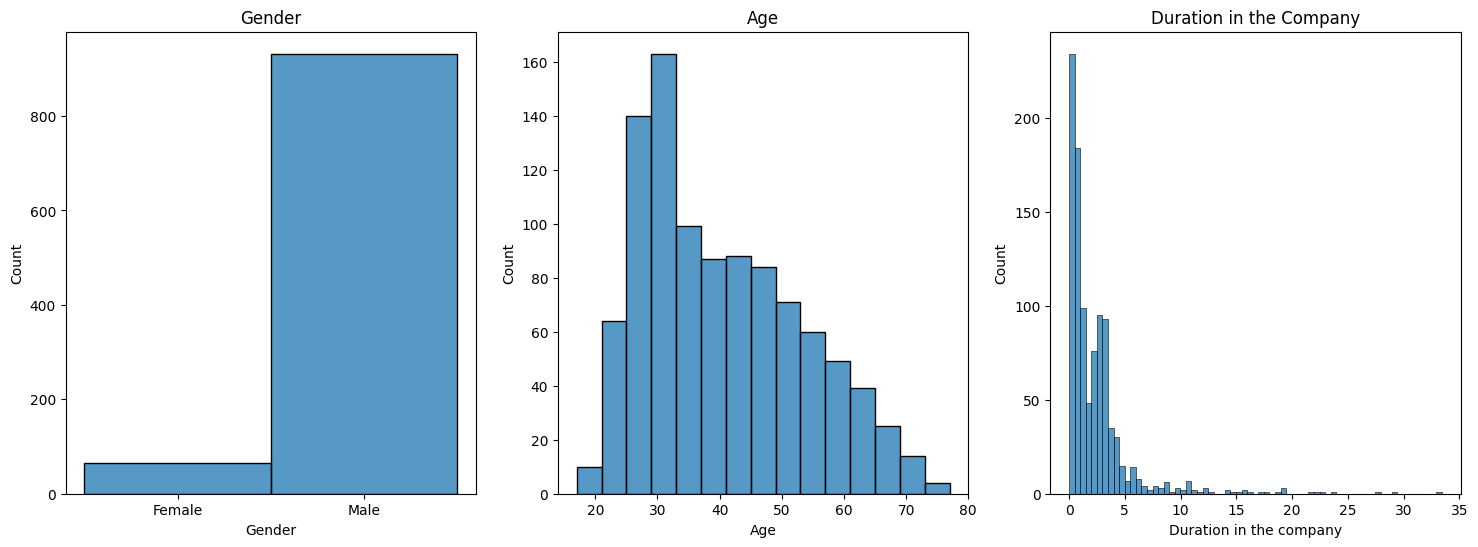

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


temp_map_back = {0:"Female", 1:"Male"}

# Plot the distribution of "Gender"
sns.histplot(marvellous["Gender"].map(temp_map_back).astype("category"), ax=axes[0])
axes[0].set_title("Gender")

# Plot the distribution of "Year_of_Birth"
sns.histplot(2023 - df["Year_of_Birth"], ax=axes[1])
axes[1].set_title("Age")
axes[1].set_xlabel("Age")

# Plot the distribution of "ages_in_the_company"
sns.histplot(df["ages_in_the_company"], ax=axes[2])
axes[2].set_title("Duration in the Company")
axes[2].set_xlabel("Duration in the company")

# Show the plot
plt.show()

In [ ]:
marvellous.to_csv("transformed.csv")

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a StandardScaler object
scaler = MinMaxScaler()

# Fit and transform the Year_of_Birth, ages_in_the_company, and Net Salary columns
marvellous["Year_of_Birth"] = scaler.fit_transform(marvellous["Year_of_Birth"].values.reshape(-1, 1))
marvellous["ages_in_the_company"] = scaler.fit_transform(marvellous["ages_in_the_company"].values.reshape(-1, 1))
marvellous["Net Salary"] = scaler.fit_transform(marvellous["Net Salary"].values.reshape(-1, 1))


In [ ]:
marvellous.head()

,Gender,Marital_Status,Designation_ID,Status,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,ages_in_the_company,reported,Marital_Status_Married,Marital_Status_Single,Employment_Type_Contarct Basis,Employment_Type_Permanant,Religion_Buddhist,Religion_Catholic,Religion_Hindu,Religion_Muslim,Employee_No,Net Salary
0,1,Married,24,1,2,Permanant,Buddhist,Driver,0.316667,0.869736,0,True,False,False,True,True,False,False,False,347,0.138658
1,1,Married,24,1,2,Permanant,Buddhist,Driver,0.450000,0.831968,0,True,False,False,True,True,False,False,False,348,0.239570
2,1,Married,23,0,2,Permanant,Buddhist,Account Clerk,0.466667,1.000000,0,True,False,False,True,True,False,False,False,349,0.189114
3,0,Married,40,0,2,Permanant,Catholic,Purchasing Officer,0.466667,0.668360,0,True,False,False,True,False,True,False,False,351,0.065114
4,1,Married,7,1,2,Permanant,Buddhist,Store Keeper,0.566667,0.656235,0,True,False,False,True,True,False,False,False,352,0.134611


In [ ]:
n = list(marvellous.columns)

In [ ]:
selected_features = [
 'Gender',
 'Marital_Status',
 'Designation_ID',
 'Status',
 'Employment_Category',
 'Employment_Type',
 'Religion',
 'Designation',
 'Year_of_Birth',
 'ages_in_the_company',
 'reported',
 'Net Salary'
]
df = marvellous[selected_features].copy(deep=True)

In [ ]:
df.describe()

,Gender,Designation_ID,Status,Employment_Category,Year_of_Birth,ages_in_the_company,reported,Net Salary
count,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000
mean,0.934804,48.504514,0.233701,1.455366,0.616566,0.071592,0.061184,0.101662
std,0.246995,43.112201,0.423397,0.546313,0.213751,0.099757,0.239787,0.112464
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,27.000000,0.000000,1.000000,0.466667,0.016713,0.000000,0.027328
50%,1.000000,31.000000,0.000000,1.000000,0.650000,0.040472,0.000000,0.058993
75%,1.000000,55.000000,0.000000,2.000000,0.800000,0.092086,0.000000,0.138700
max,1.000000,201.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


child labour 🙂


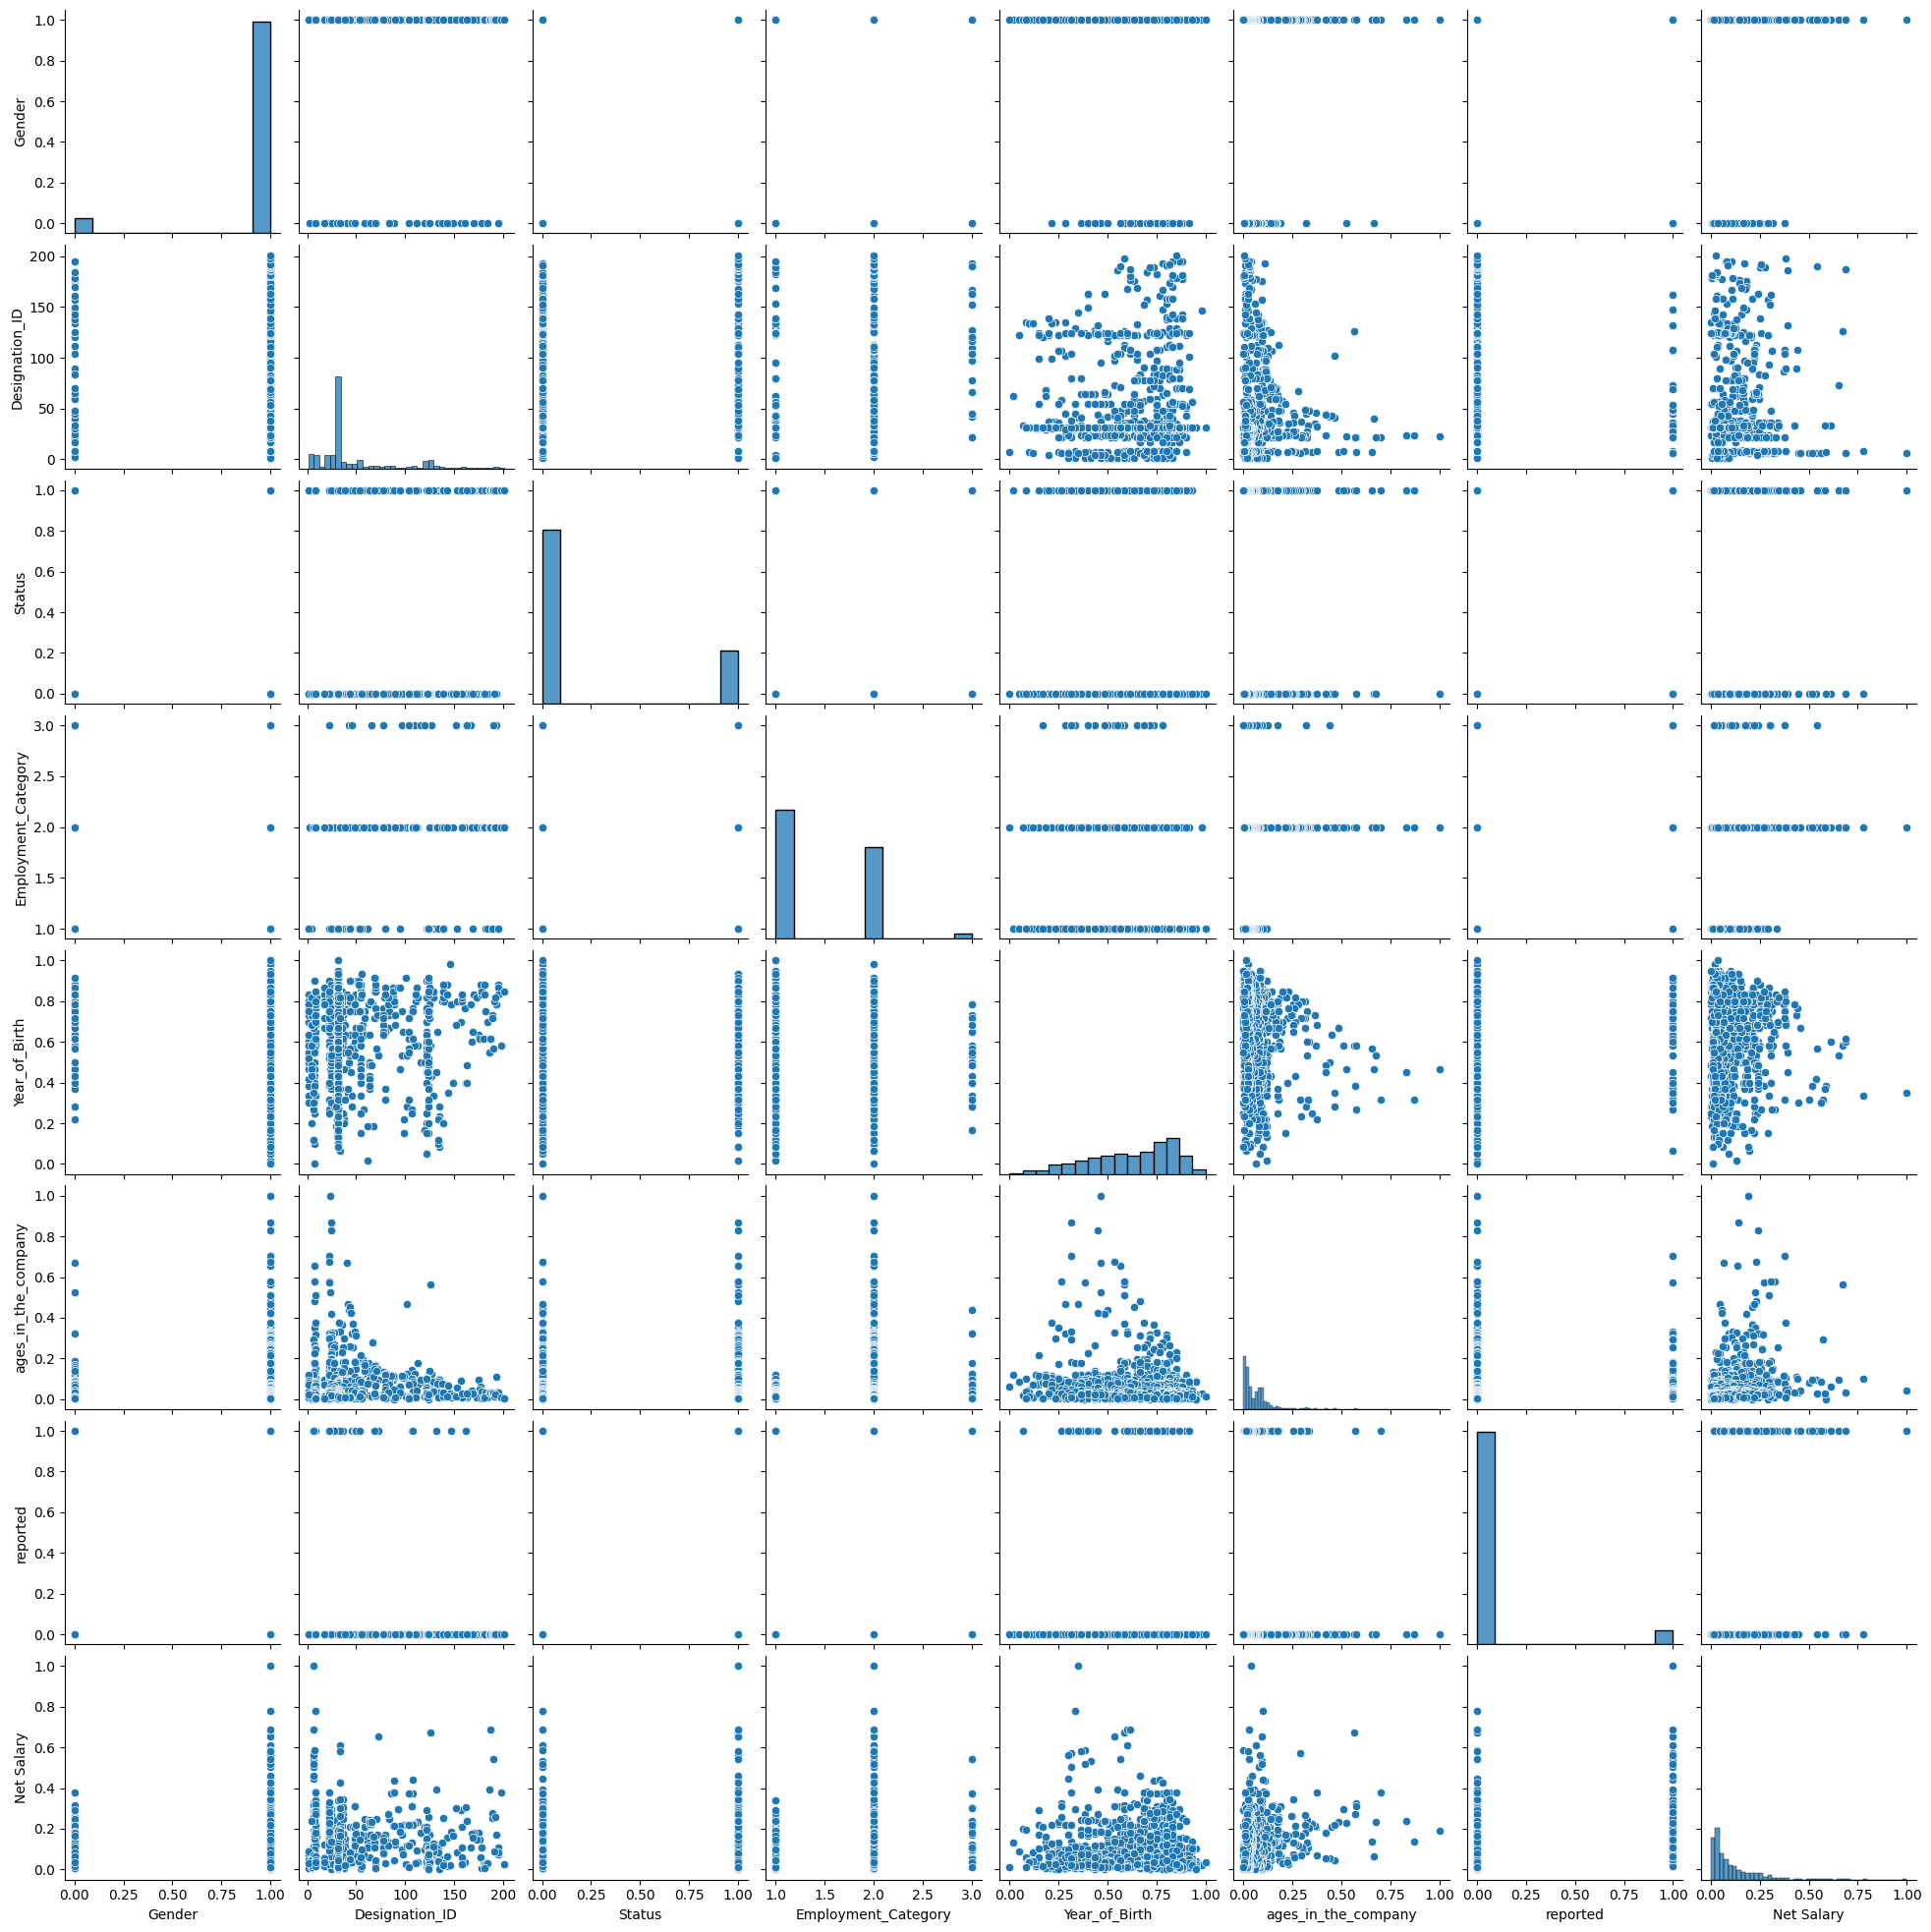

In [ ]:
sns.pairplot(df)

We can see thath the workforce of the company is relatively young and shows an skewed distribution of the age

and most of the inactive people are the contract based workers

In [ ]:

grouped_df = marvellous.groupby(['Employment_Type', 'Status']).size()

grouped_df


Employment_Type  Status
Contarct Basis   0         754
                 1         223
Permanant        0          10
                 1          10
dtype: int64

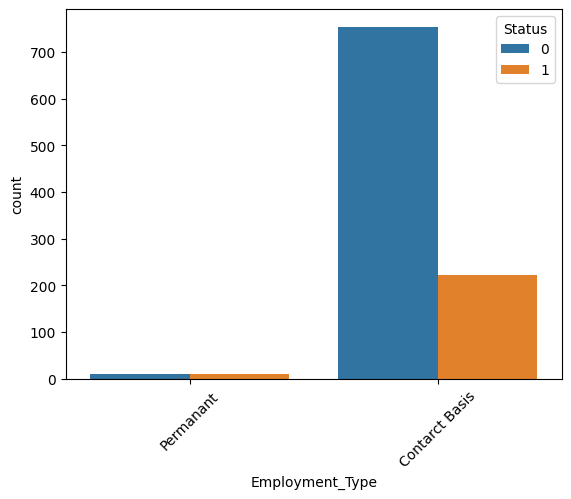

In [ ]:

sns.countplot(data=df, x="Employment_Type", hue="Status")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
X = marvellous.drop(["Marital_Status", "Employment_Type", "Religion", "Designation", "Marital_Status", "Status", "Employee_No"], axis=1)
y = marvellous["Status"]


In [ ]:
marvellous.head()

,Gender,Marital_Status,Designation_ID,Status,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,ages_in_the_company,reported,Marital_Status_Married,Marital_Status_Single,Employment_Type_Contarct Basis,Employment_Type_Permanant,Religion_Buddhist,Religion_Catholic,Religion_Hindu,Religion_Muslim,Employee_No,Net Salary
0,1,Married,24,1,2,Permanant,Buddhist,Driver,0.316667,0.869736,0,True,False,False,True,True,False,False,False,347,0.138658
1,1,Married,24,1,2,Permanant,Buddhist,Driver,0.450000,0.831968,0,True,False,False,True,True,False,False,False,348,0.239570
2,1,Married,23,0,2,Permanant,Buddhist,Account Clerk,0.466667,1.000000,0,True,False,False,True,True,False,False,False,349,0.189114
3,0,Married,40,0,2,Permanant,Catholic,Purchasing Officer,0.466667,0.668360,0,True,False,False,True,False,True,False,False,351,0.065114
4,1,Married,7,1,2,Permanant,Buddhist,Store Keeper,0.566667,0.656235,0,True,False,False,True,True,False,False,False,352,0.134611


In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib import pyplot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)



print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.92      0.94      0.93       163
           1       0.71      0.65      0.68        37

    accuracy                           0.89       200
   macro avg       0.81      0.79      0.80       200
weighted avg       0.88      0.89      0.88       200



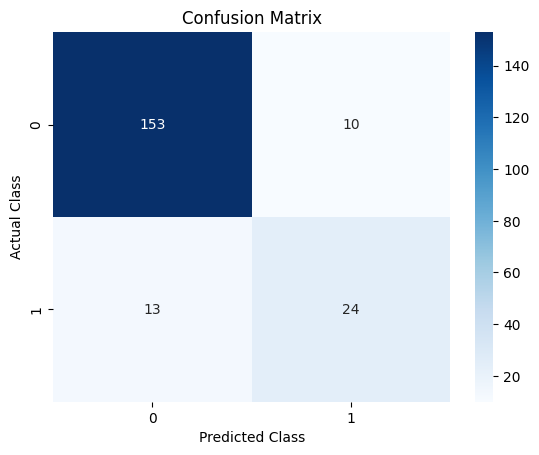

In [ ]:

cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Set the title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

# Show the plot
plt.show()


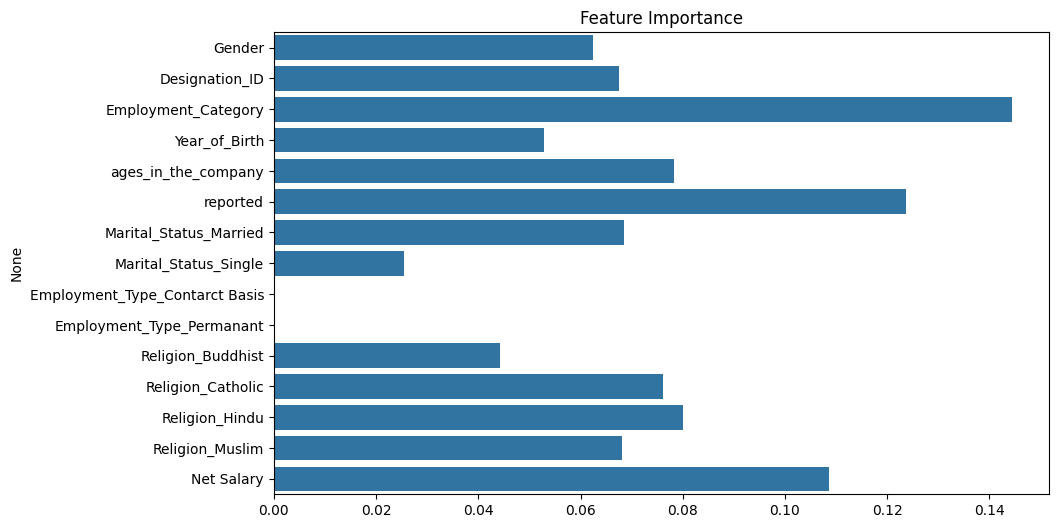

In [ ]:

importances = model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()
